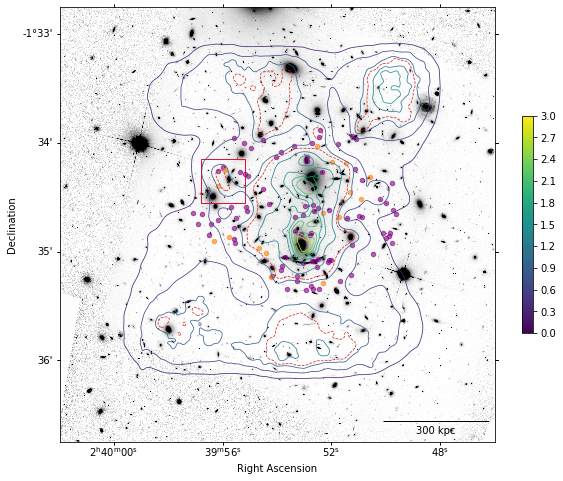

In [20]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          970,
                          r"300 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,color='black',
                          frameon=False)
    ax.add_artist(asb)



RA = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/RA.dat')
dec = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/dec.dat')


filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370p/BestFit/hlsp_buffalo_model_abell370_williams_v1_kappa.fits')
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/abell370_60mas_acs-wfc_f814w_v1.0-20190201_drz.fits')

hdu1 = fits.open(filename1)[0]
hdu = fits.open(filename)[0]

wcs = WCS(hdu.header)
fig, ax = plt.subplots(figsize=(10,8))


datacut=hdu.data[6000:10000,10500:14500]
wcscut=wcs[6000:10000,10500:14500]
ax = plt.subplot(projection=wcscut)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


plt.imshow(datacut, origin='lower',vmax=0.1,vmin=-0.001,cmap='binary')

r = Rectangle((1300., 2200.), 400., 400., edgecolor='crimson', facecolor='none',linewidth=1)
ax.add_patch(r)

# c = Circle((1360., 2300.), 50, edgecolor='gold', facecolor='none')
# ax.add_patch(c)

plt.scatter(RA[0:25],dec[0:25], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[30:34],dec[30:34], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[39:55],dec[39:55], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[60:83],dec[60:83], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[85:95],dec[85:95], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[97:98],dec[97:98], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[111:112],dec[111:112], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[115:118],dec[115:118], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)
plt.scatter(RA[130:132],dec[130:132], transform=ax.get_transform('fk5'), marker='o', color='purple', alpha=0.6,s=20)

plt.scatter(RA[26:27],dec[26:27], transform=ax.get_transform('fk5'), marker='o', color='tab:orange', alpha=0.6,s=20)
plt.scatter(RA[127:129],dec[127:129], transform=ax.get_transform('fk5'), marker='o', color='tab:orange', alpha=0.6,s=20)
plt.scatter(RA[36:38],dec[37:39], transform=ax.get_transform('fk5'), marker='o', color='tab:orange', alpha=0.6,s=20)
plt.scatter(RA[133:142],dec[133:142], transform=ax.get_transform('fk5'), marker='o', color='tab:orange', alpha=0.6,s=20)
plt.scatter(RA[163:165],dec[163:165], transform=ax.get_transform('fk5'), marker='o', color='tab:orange', alpha=0.6,s=20)


# plt.scatter(39.9582,-1.61, transform=ax.get_transform('fk5'), 
#             marker='+', color='black', alpha=1)
# plt.scatter(39.942,-1.61, transform=ax.get_transform('fk5'), 
#             marker='+', color='black', alpha=1)

draw_sizebar(ax)

im=plt.contour(hdu1.data, 10,cmap='viridis',transform=ax.get_transform(WCS(hdu1.header)),linewidths=0.75)
plt.contour(hdu1.data, [1],colors='tab:red',linestyles='dashed',transform=ax.get_transform(WCS(hdu1.header)),linewidths=0.75)



norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=im.levels, shrink=0.5)


fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/A370_BUFFALO_mosaic.pdf', dpi=72, transparent=True, bbox_inches='tight')

In [51]:
print(np.shape(hdu.data))


(13200, 9600)


In [23]:
hdu.data

array([[0.062916, 0.064317, 0.065738, ..., 0.040231, 0.0395  , 0.038775],
       [0.06417 , 0.065607, 0.067064, ..., 0.040942, 0.040194, 0.039452],
       [0.06543 , 0.066903, 0.068397, ..., 0.041658, 0.040892, 0.040133],
       ...,
       [0.040227, 0.041058, 0.041899, ..., 0.100411, 0.097956, 0.095495],
       [0.039632, 0.040445, 0.041269, ..., 0.098294, 0.095905, 0.09351 ],
       [0.039034, 0.03983 , 0.040636, ..., 0.096167, 0.093844, 0.091516]],
      dtype=float32)

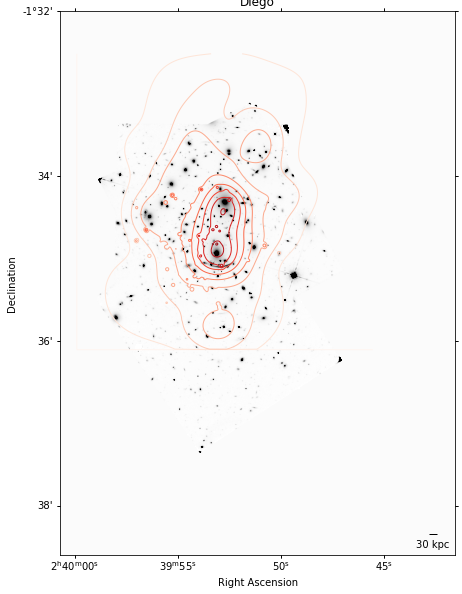

In [38]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord


# RA = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/RA.dat')
# dec = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/dec.dat')

from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          97,
                          r"30 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,color='black',
                          frameon=False)
    ax.add_artist(asb)



filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_diego_v4.1_kappa.fits')
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_hst_wfc3-60mas_abell370_f160w_v1.0-epoch2_drz.fits')

hdu1 = fits.open(filename1)[0]
hdu = fits.open(filename)[0]

wcs = WCS(hdu.header)
fig, ax = plt.subplots(figsize=(10,10))


# datacut=hdu.data[7000:9500,11250:14000]
# wcscut=wcs[7000:9500,11250:14000]
ax = plt.subplot(projection=wcs)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


plt.imshow(hdu.data, origin='lower',vmax=0.5,vmin=-0.01,cmap='binary')
im=plt.contour(hdu1.data, 10, cmap='Reds',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)

# norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
# sm.set_array([])
# fig.colorbar(sm, ticks=im.levels, shrink=0.5)

# plt.scatter(RA,dec, transform=ax.get_transform('fk5'), 
#             marker='o', color='red', alpha=0.6,facecolors='none')

draw_sizebar(ax)

# ax.plot([Angle('2h39m56.647s').deg,Angle('2h39m56.540s').deg,Angle('2h39m56.477s').deg,Angle('2h39m56.604s').deg,Angle('2h39m56.647s').deg],[Angle('-1d34m26.36s').deg,Angle('-1d34m24.64s').deg,Angle('-1d34m26.35s').deg,Angle('-1d34m28.91s').deg,Angle('-1d34m26.36s').deg], 
#         transform=ax.get_transform('fk5'), color='g',alpha=0.4,linewidth=0.5)
ax.set_title('Diego')
plt.show()

# plt.scatter(285, 581, transform=ax.get_transform('pixel'), marker='+', color='blue')

# fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/A370_BUFFALO_images.pdf', dpi=720, transparent=True, bbox_inches='tight')

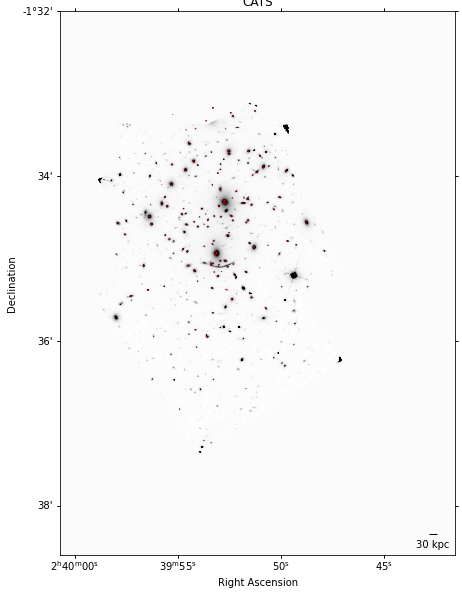

In [33]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_cats_v4_kappa.fits')
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_hst_wfc3-60mas_abell370_f160w_v1.0-epoch2_drz.fits')

hdu1 = fits.open(filename1)[0]
hdu = fits.open(filename)[0]

wcs = WCS(hdu.header)
fig, ax = plt.subplots(figsize=(10,10))


# datacut=hdu.data[7000:9500,11250:14000]
# wcscut=wcs[7000:9500,11250:14000]
ax = plt.subplot(projection=wcs)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


plt.imshow(hdu.data, origin='lower',vmax=0.5,vmin=-0.01,cmap='binary')
im=plt.contour(hdu1.data, 10, vmax=5,cmap='Reds',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)

# norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
# sm.set_array([])
# fig.colorbar(sm, ticks=im.levels, shrink=0.5)

# plt.scatter(RA,dec, transform=ax.get_transform('fk5'), 
#             marker='o', color='red', alpha=0.6,facecolors='none')
plt.title('CATS')

draw_sizebar(ax)

plt.show()

In [1]:

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/abell370_60mas_acs-wfc_f814w_v1.0-20190201_drz.fits')


hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
fig, ax = plt.subplots(figsize=(10, 5))

ax = plt.subplot(projection=wcs)

ax.set_aspect('equal')
im=plt.imshow(hdu.data, origin='lower', cmap='plasma')
# plt.contour(hdu.data, 13, origin='lower', colors='white', alpha=0.4)
fig.colorbar(im,ax=ax)

plt.show()




<Figure size 1000x500 with 2 Axes>

In [47]:


Angle('39.994628deg').hms

hms_tuple(h=2.0, m=39.0, s=58.71072000000183)

Filename: /Users/agnivaghosh/Downloads/Lensing/abell370_acs_RGB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4039   ()      
  1                1 ImageHDU      4042   (21000, 13500)   uint8   
  2                1 ImageHDU      4042   (21000, 13500)   uint8   
  3                1 ImageHDU      4042   (21000, 13500)   uint8   


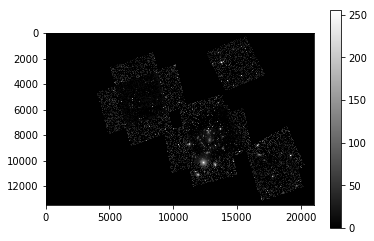

In [6]:
image_file = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/abell370_acs_RGB.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
plt.figure()
plt.imshow(image_data,cmap='gray')
plt.colorbar()



In [5]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          500,
                          r"300 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)



filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_hst_wfc3-60mas_abell370_f160w_v1.0-epoch2_drz.fits')
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/hlsp_frontier_hst_acs-30mas_abell370_f814w_v1.0-epoch1_drz.fits')

hdu1 = fits.open(filename1)[0]
hdu = fits.open(filename)[0]
# image_data = fits.getdata(image_file, ext=0)

wcs = WCS(hdu.header)
fig, ax = plt.subplots(figsize=(10,8))


datacut=hdu.data[5000:10500,750:6000]
wcscut=wcs[5000:10500,750:6000]
ax = plt.subplot(projection=wcscut)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


plt.imshow(datacut, origin='lower',vmax=0.1
                        ,vmin=-0.001,cmap='binary')
im=plt.contour(hdu1.data, 10, cmap='Reds',transform=ax.get_transform(WCS(hdu1.header)),linewidths=0.5)

norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=im.levels, shrink=0.5)
draw_sizebar(ax)

# plt.scatter(RA,dec, transform=ax.get_transform('fk5'), 
#             marker='o', color='blue', alpha=0.3,facecolors='none')

# ax.plot([Angle('2h39m56.647s').deg,Angle('2h39m56.540s').deg,Angle('2h39m56.477s').deg,Angle('2h39m56.604s').deg,Angle('2h39m56.647s').deg],[Angle('-1d34m26.36s').deg,Angle('-1d34m24.64s').deg,Angle('-1d34m26.35s').deg,Angle('-1d34m28.91s').deg,Angle('-1d34m26.36s').deg], 
#         transform=ax.get_transform('fk5'), color='g',alpha=0.4,linewidth=0.5)


# plt.scatter(285, 581, transform=ax.get_transform('pixel'), marker='+', color='blue')

# fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/A370_HFF_massmap.pdf', dpi=720, transparent=True, bbox_inches='tight')

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org//Users/agnivaghosh/Downloads/Lensing/hlsp_frontier_hst_acs-30mas_abell370_f814w_v1.0-epoch1_drz.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data//Users/agnivaghosh/Downloads/Lensing/hlsp_frontier_hst_acs-30mas_abell370_f814w_v1.0-epoch1_drz.fits': <HTTPError 404: 'Not Found'>}>

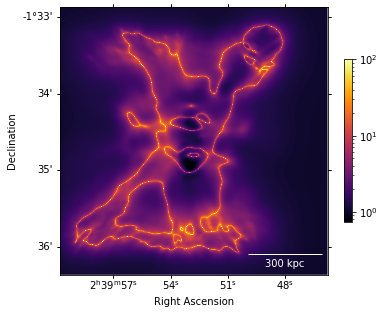

In [28]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord

from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          290,
                          r"300 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,color='white',
                          frameon=False)
    ax.add_artist(asb)





filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370p/BestFit/hlsp_buffalo_model_abell370_williams_v1_z09-magnif.fits')
# filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/hlsp_frontier_hst_acs-30mas_abell370_f814w_v1.0-epoch1_drz.fits')

hdu1 = fits.open(filename1)[0]
# image_data = fits.getdata(image_file, ext=0)

wcs = WCS(hdu1.header)
fig, ax = plt.subplots(figsize=(6,6))


# datacut=hdu.data[5000:10500,750:6000]
# wcscut=wcs[5000:10500,750:6000]
ax = plt.subplot(projection=wcs)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


im=plt.imshow(hdu1.data, origin='lower',cmap='inferno',norm=matplotlib.colors.LogNorm(),vmax=100)
# plt.contour(hdu1.data, 10, colors='white',transform=ax.get_transform(WCS(hdu1.header)),linewidths=0.5)

# norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
# sm.set_array([])
fig.colorbar(im, shrink=0.5)
draw_sizebar(ax)

# plt.scatter(39.9582,-1.60, transform=ax.get_transform('fk5'), 
#             marker='+', color='white', alpha=1)
# plt.scatter(39.942,-1.60, transform=ax.get_transform('fk5'), 
#             marker='+', color='white', alpha=1)

# plt.scatter(RA,dec, transform=ax.get_transform('fk5'), 
#             marker='o', color='blue', alpha=0.3,facecolors='none')

# ax.plot([Angle('2h39m56.647s').deg,Angle('2h39m56.540s').deg,Angle('2h39m56.477s').deg,Angle('2h39m56.604s').deg,Angle('2h39m56.647s').deg],[Angle('-1d34m26.36s').deg,Angle('-1d34m24.64s').deg,Angle('-1d34m26.35s').deg,Angle('-1d34m28.91s').deg,Angle('-1d34m26.36s').deg], 
#         transform=ax.get_transform('fk5'), color='g',alpha=0.4,linewidth=0.5)


# plt.scatter(285, 581, transform=ax.get_transform('pixel'), marker='+', color='blue')

# fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/A370_BUFFALO_magmap.pdf', dpi=720, transparent=True, bbox_inches='tight')

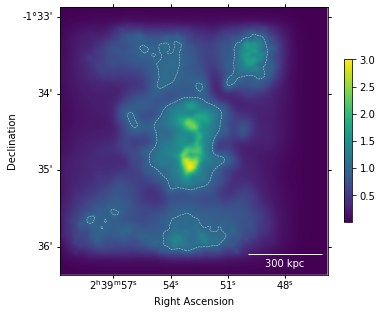

In [26]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord

from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          290,
                          r"300 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,color='white',
                          frameon=False)
    ax.add_artist(asb)


filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370p/BestFit/hlsp_buffalo_model_abell370_williams_v1_kappa.fits')
# filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/hlsp_frontier_hst_acs-30mas_abell370_f814w_v1.0-epoch1_drz.fits')

hdu1 = fits.open(filename1)[0]
# image_data = fits.getdata(image_file, ext=0)

wcs = WCS(hdu1.header)
fig, ax = plt.subplots(figsize=(6,6))


# datacut=hdu.data[5000:10500,750:6000]
# wcscut=wcs[5000:10500,750:6000]
ax = plt.subplot(projection=wcs)

lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right Ascension')
lat.set_axislabel('Declination')
ax.set_aspect('equal')


im=plt.imshow(hdu1.data, origin='lower',cmap='viridis',vmax=3)
plt.contour(hdu1.data, [1], colors='white',linestyles='dashed',transform=ax.get_transform(WCS(hdu1.header)),linewidths=0.5,alpha=0.7)

# norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(), vmax=im.cvalues.max())
# sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
# sm.set_array([])
fig.colorbar(im, shrink=0.5)
draw_sizebar(ax)



# ax.plot([Angle('2h39m56.647s').deg,Angle('2h39m56.540s').deg,Angle('2h39m56.477s').deg,Angle('2h39m56.604s').deg,Angle('2h39m56.647s').deg],[Angle('-1d34m26.36s').deg,Angle('-1d34m24.64s').deg,Angle('-1d34m26.35s').deg,Angle('-1d34m28.91s').deg,Angle('-1d34m26.36s').deg], 
#         transform=ax.get_transform('fk5'), color='g',alpha=0.4,linewidth=0.5)


# plt.scatter(285, 581, transform=ax.get_transform('pixel'), marker='+', color='blue')

fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/A370_BUFFALO_massmap.pdf', dpi=720, transparent=True, bbox_inches='tight')